In [1]:
import firebase_admin
from firebase_admin import firestore
import os
import pandas as pd
from pathlib import Path
import sys
sys.path.append(os.path.dirname(os.getcwd() ))

import visualize


In [2]:
cred = firebase_admin.credentials.Certificate('key.json')
default_app = firebase_admin.initialize_app(cred)
db = firestore.client()
instructions_ref = db.collection('instructions')
verify_ref = db.collection('verification')


In [3]:
list_instruction = list(instructions_ref.get())
list_verification = list(verify_ref.get())
len(list_instruction), len(list_verification)

#10404


(10404, 18815)

In [4]:
# instructions_ref_sandbox = db.collection('instructions_sandbox')
# verify_ref_sandbox = db.collection('verification_sandbox')

# list_instruction_sandbox = list(instructions_ref_sandbox.get())
# list_verification_sandbox = list(verify_ref_sandbox.get())
# len(list_instruction_sandbox), len(list_verification_sandbox)

In [4]:
# Qualified workers
current_dir = os.getcwd()
parent_dir = Path(current_dir).parent.absolute()
path_qualified = os.path.join(parent_dir, "qualified_workers.csv")

qualified_work_list = pd.read_csv(path_qualified, header=None)[0].tolist()

qualified_work_list

['1',
 '1A',
 'AY7WPVKHVNBLG',
 'A1198W1SPF1R4',
 'A3QAL3X23LHJRV',
 'A3GWRDHAURRNK6',
 'ALYR5CI2SM2JC',
 'A320QA9HJFUOZO',
 'APRZ7BR8C0ZMQ',
 'A3862RIFFUV141',
 'A1AKL5YH9NLD2V',
 'A2WX434EAQOE29',
 'AYIFHDQSXQJ6B',
 'A21LONLNBOB8Q',
 'A3UENPLNM9AQBK',
 'A5WWHKD82I8UE']

In [5]:
# # Takes a long time!!!!  ~10m

# # Set qualified instructions as RVS_excellent  - UPDATES DATA!!!
# qualified_instructions = [
#   e.to_dict()['key'] for e in list_instruction if (
#     e.to_dict()['work_id'] in qualified_work_list) ]

# for id in qualified_instructions:
#   instructions_ref.document(id).update(
#     {'review': 'RVS_excellent'})


In [ ]:
# # Split instructions to train, dev, test sets.
# import json

# instruction_dir = "/mnt/hackney/human_data"

# def save_split(split_name, split_set):

#   split_path = os.path.join(instruction_dir, split_name)
#   if os.path.exists(split_path):
#     os.remove(split_path)
#   with open(split_path, 'a') as outfile:
#     for sample in split_set:
#       json.dump(sample, outfile, default=lambda o: o.__dict__)
#       outfile.write('\n')
#       outfile.flush()

#   print (f"Size of {split_name} set:{len(split_set)} saved to: {split_path}")


# # Save set splits

# dev_ids = ['X']
# test_ids = ['X']


# test_set =  [
#   x.to_dict() for x in list_instruction if 'Manhattan' in x.to_dict()['region'] and x.to_dict()['work_id'] in test_ids]

# save_split("test.json", test_set)

# dev_set =  [
#   x.to_dict() for x in list_instruction if 'Manhattan' in x.to_dict()['region'] and x.to_dict()['work_id'] in dev_ids]

# save_split("dev.json", dev_set)

# train_set = [
#   x.to_dict() for x in list_instruction if 'Manhattan' in x.to_dict()['region'] and x.to_dict()['work_id'] not in dev_ids+test_ids]

# save_split("train.json", train_set)


In [5]:
df_instruction_manhattan = pd.DataFrame(
    [
        x.to_dict() for x in list_instruction if 'Manhattan' in x.to_dict()['region'] ])

df_instruction_pitssburgh = pd.DataFrame(
    [
        x.to_dict() for x in list_instruction if 'Pittsburgh' in x.to_dict()['region'] ])

df_instruction_philadelphia = pd.DataFrame(
    [
        x.to_dict() for x in list_instruction if 'Philadelphia' in x.to_dict()['region'] ])

print (df_instruction_manhattan.shape[0], df_instruction_pitssburgh.shape[0], df_instruction_philadelphia.shape[0])

8103 1023 1278


In [6]:
# check the new workers ID
df_instruction_manhattan = pd.DataFrame(
    [
        x.to_dict() for x in list_instruction if 'Manhattan' in x.to_dict()['region'] and  'date_start' in x.to_dict() and '2022-11-01' <x.to_dict()['date_start'] ])

df_verification = pd.DataFrame(
        [x.to_dict() for x in list_verification] )


df_manhattan = df_instruction_manhattan.merge(df_verification, left_on='key', right_on='key_instruction')

# work_ids = list(set(df_manhattan['work_id_x'].to_list()))


# for work_id in work_ids:
#     if work_id in qualified_work_list:
#         continue
#     sample_worker = df_manhattan[df_manhattan['work_id_x']==work_id]
#     if sample_worker.shape[0]<3:
#         continue
#     sample_worker = sample_worker.sort_values( by=['date_start_x'], ascending=False)
#     print (f"--------{work_id}--------")
#     print (sample_worker[['date_start_x', 'review', 'assignmentId_x','dist_m']])


In [7]:
# Check the stack of RVS_excellent
all_data = pd.DataFrame([x.to_dict() for x in list_instruction ])
x = all_data[all_data['review']=='RVS_excellent' ]
print (f"RVS_excellent: {x[x['verified_n']==0].shape[0]}")
# invalid
invalid = all_data[all_data['valid']==False]
print (f"invalid: {invalid.shape[0]}")

# invalid: 88



RVS_excellent: 0
invalid: 0


In [8]:
# merge instructions with verification
df_instruction = pd.DataFrame([x.to_dict() for x in list_instruction])
df_ver = pd.DataFrame([x.to_dict() for x in list_verification ])

instruction_ver = df_instruction.merge(df_ver, left_on='key', right_on='key_instruction')


In [9]:
# Valid instruction
dist_threshold = 100


manhattan_instruction_ver = instruction_ver[instruction_ver['region']=='Manhattan']
pittsburgh_instruction_ver = instruction_ver[instruction_ver['region']=='Pittsburgh']
philadelphia_instruction_ver = instruction_ver[instruction_ver['region']=='Philadelphia']


all_valid_instructions = instruction_ver[instruction_ver['dist_m']<dist_threshold]
manhattan_valid_instructions = all_valid_instructions[all_valid_instructions['region']=='Manhattan']
pittsburgh_valid_instructions = all_valid_instructions[all_valid_instructions['region']=='Pittsburgh']
philadelphia_valid_instructions = all_valid_instructions[all_valid_instructions['region']=='Philadelphia']


valid_instructions = all_valid_instructions.groupby('key_instruction').min()
# all_instructions = instruction_ver.groupby('key_x').min()
len_instructions = instruction_ver.drop_duplicates(subset=['key_x']).shape[0]
print (f"All valid for theshold {dist_threshold}: {round(100*valid_instructions.shape[0]/len_instructions, 3)}" )


manhattan_valid_instructions = manhattan_valid_instructions.groupby('key_instruction').min()
len_manhattan_instructions = manhattan_instruction_ver.drop_duplicates(subset=['key_x']).shape[0]
print (f"Manhattan valid for theshold {dist_threshold}: {round(100*manhattan_valid_instructions.shape[0]/len_manhattan_instructions, 3)}" )

pittsburgh_valid_instructions = pittsburgh_valid_instructions.groupby('key_instruction').min()
len_pittsburgh_instructions = pittsburgh_instruction_ver.drop_duplicates(subset=['key_x']).shape[0]
print (f"Pittsburgh valid for theshold {dist_threshold}: {round(100*pittsburgh_valid_instructions.shape[0]/len_pittsburgh_instructions, 3)}" )


philadelphia_valid_instructions = philadelphia_valid_instructions.groupby('key_instruction').min()
len_philadelphia_instructions = philadelphia_instruction_ver.drop_duplicates(subset=['key_x']).shape[0]
print (f"Philadelphia valid for theshold {dist_threshold}: {round(100*philadelphia_valid_instructions.shape[0]/len_philadelphia_instructions, 3)}" )


# All valid for theshold 100: 98.286
# Manhattan valid for theshold 100: 98.6
# Pittsburgh valid for theshold 100: 95.797
# Philadelphia valid for theshold 100: 100.0




All valid for theshold 100: 100.0
Manhattan valid for theshold 100: 100.0
Pittsburgh valid for theshold 100: 100.0
Philadelphia valid for theshold 100: 100.0


In [10]:
print (f"Manhttan-set: {manhattan_valid_instructions.shape[0]}")
print (f"Pittsburgh-set: {pittsburgh_valid_instructions.shape[0]}")
print (f"Philadelphia-set: {philadelphia_valid_instructions.shape[0]}")

Manhttan-set: 8103
Pittsburgh-set: 1023
Philadelphia-set: 1278


In [11]:
# status of colection

print (f"size of Manhattan-set: {len_manhattan_instructions}")
print (f"size of Pittsburgh-set: {len_pittsburgh_instructions}")
print (f"size of Philadelphia-set: {len_philadelphia_instructions}")

size of Manhattan-set: 8103
size of Pittsburgh-set: 1023
size of Philadelphia-set: 1278


In [12]:
# # assure all points are of the same format  - UPDATES DATA!!!
# import math
# import util

# list_instruction_all_x = [x.to_dict() for x in list_instruction]
# for sample in list_instruction_all_x: 
#   for key, point in sample.items():
#     FLAG_prob = False
#     if not 'point' in key:
#       continue
      

#     if isinstance(point, list):
#       if not(isinstance(point[0], float) and isinstance(point[1], float)):
#         FLAG_prob = True
#       y = float(point[0])
#       x = float(point[1])
#       point = [y ,x]
#     else:
#       FLAG_prob = True
#       point = util.point_from_str_point(point)
#       y = point.y
#       x = point.x
#       point = [y, x]
#       if not (y>40 and x<-73):
#         if x>40 and y<-73:
#           point = [x, y]

#     assert isinstance(y, float) and isinstance(x, float), print (type(y), type(x))
#     assert (isinstance(point, list) and point[0]>40 and point[1]<-73), print(point )

#     id = sample['key']
#     # instructions_ref.document(id).update(
#     #       {key: point})
#     if FLAG_prob:
#       print (f"Writng task PROB with {key}: {sample['key']} ")


# # verify 
# list_verification_x = [x.to_dict() for x in list_verification]
# for sample in list_verification_x: 
#   for key, point in sample.items():
#     FLAG_prob = False
#     if not 'point' in key:
#       continue
    
#     if isinstance(point, list):
#       if isinstance(point[0], float) and isinstance(point[1], float):
#         if (isinstance(point, list) and point[0]>40 and point[1]<-73):
#           continue
#         else:
#           FLAG_prob = True
#       else:
#         FLAG_prob = True
#       y = float(point[0])
#       x = float(point[1])
#       point = [y ,x]
#     else:
#       FLAG_prob = True
#       point = util.point_from_str_point(point)
#       y = point.y
#       x = point.x
#       point = [y, x]
#       if not (y>40 and x<-73):
#         if x>40 and y<-73:
#           point = [x, y]

#     assert isinstance(y, float) and isinstance(x, float), print (type(y), type(x))
#     assert (isinstance(point, list) and point[0]>40 and point[1]<-73), print(f"point: {point} key: {sample['key']}")
    
#     if 'key' not in sample:
#       print (sample['assignmentId'])
#       continue
    
#     if FLAG_prob:
#       print (f"Verify PROB with {key}: {sample['key']} ")
#       id = sample['key']
#       # verify_ref.document(id).update(
#       #       {key: point})

    

In [12]:
import util
import math

# UPDATE!!!
content = "marked in red"

# Check all distances are correct 
for i in range(0,instruction_ver.shape[0]):
  sample = instruction_ver.iloc[i]
  if sample['rvs_goal_point_y']!=sample['rvs_goal_point_x']:
    point_goal_y = util.point_from_list_coord_yx(sample['rvs_goal_point_y'])
    point_goal_x = util.point_from_list_coord_yx(sample['rvs_goal_point_x'])
    dist = round(util.get_distance_between_points(point_goal_y, point_goal_x))
    if dist>1:
      print (f"goal point - key: {sample['key_x']}| {sample['rvs_goal_point_x']}!= {sample['rvs_goal_point_y']}")
      id = sample['key_y']
      verify_ref.document(id).update(
          {'rvs_goal_point': sample['rvs_goal_point_x']})
    
    if not isinstance(sample['rvs_goal_point_y'], list) and math.isnan(sample['rvs_goal_point_y']): 
      id = sample['key_y']
      # verify_ref.document(id).update(
      #     {'rvs_goal_point': sample['rvs_goal_point_x']})

 
  if sample['rvs_start_point_x']!=sample['rvs_start_point_y']:
    point_start_y = util.point_from_list_coord_yx(sample['rvs_start_point_y'])
    point_start_x = util.point_from_list_coord_yx(sample['rvs_start_point_x'])

    dist = round(util.get_distance_between_points(point_start_y, point_start_x))

    if dist==0:
      continue
    print (f"start point - key: {sample['key_x']}| {sample['rvs_start_point_x']}!= {sample['rvs_start_point_y']}")

    print (f"dist: {dist}")
    id = sample['key_y']
    verify_ref.document(id).update(
    {'rvs_start_point': sample['rvs_start_point_x']})


list_instruction_all_x = [x.to_dict() for x in list_instruction]
dict_col = {'assignmentId': str, 'content': str, 'date_finish': str, 'date_start': str, 'hit_id': str, 
'work_id': str, 'rvs_sample_number': str, 'rvs_path': str, 'rvs_goal_point': list, 'rvs_start_point': list, 
'task': int, 'key': str, 'valid': bool, 'verified_n': int, 'region': str, 'review': str}
should_be_coulmns = set(dict_col.keys())

for sample in list_instruction_all_x: 
  keys = set(sample.keys())
  difference = keys.difference(should_be_coulmns)
  if len(difference)>0:
    if len(difference)==1 and 'review' in difference:
      continue
    print (difference)
  if content in sample['content']:
    print (sample)

  for key, value in sample.items():
    if not isinstance(value, dict_col[key]):
      print (f"key: {key}. value: {value} {type(value)}")


  
# calc distance

list_verification_x = [x.to_dict() for x in list_verification]
print (list_verification_x[0].keys())
for sample in list_verification_x: 
  prediction = util.point_from_list_coord_yx(sample['predict_goal_point'])
  if 'rvs_goal_point' not in sample:
    if 'key_instruction' in sample:
      rvs_goal_point = df_instruction[df_instruction['key_x']==sample['key_instruction']]['rvs_goal_point_x']
      print ("rvs_goal_point: ", rvs_goal_point)
    else:
      found_matches = df_instruction[
        (
          df_instruction['rvs_path']==str(sample['rvs_path'])) & (
            df_instruction['rvs_sample_number']==str(sample['rvs_sample_number']))]
      assert found_matches.shape[0] <= 1, print(found_matches.shape[0])
      if found_matches.shape[0]==0:
        print (f"No such instruction: {sample['assignmentId']}| {sample['rvs_sample_number']}")
      else:
        print (f"one connection: {found_matches['key'].iloc[0]}")
        id = sample['key']
        # verify_ref.document(id).update(
        #   {'key_instruction': found_matches['key'].iloc[0]})


      
    # print (f"NO rvs_goal_point. \n assignmentId: {sample['assignmentId']}")
    continue 
  point_goal = util.point_from_list_coord_yx(sample['rvs_goal_point'])

  dist_true = round(util.get_distance_between_points(prediction, point_goal))
  if 'dist_m' not in sample:
    print (f"No dist_m. \n assignmentId: {sample['assignmentId']}")
    id = sample['key']
    # verify_ref.document(id).update(
    #       {'dist_m': dist_true})
    continue
  dist_m = sample['dist_m']

  if dist_true != dist_m:
    print (f"dist_true: {dist_true} | dist_m: {dist_m}")
    id = sample['key']
    verify_ref.document(id).update(
          {'dist_m': dist_true})



dict_keys(['rvs_sample_number', 'key', 'rvs_goal_point', 'predict_goal_point', 'key_instruction', 'work_id', 'task', 'assignmentId', 'hit_id', 'date_start', 'dist_m', 'rvs_path', 'date_finish', 'rvs_start_point'])


In [13]:
# Takes a long time ~10m
# Check verified_n

for index, sample in instruction_ver.iterrows():
  written_verified_n = sample['verified_n']
  key = sample['key_x']
  true_verified_n = instruction_ver[instruction_ver['key_instruction']==key].shape[0]
  if written_verified_n!=true_verified_n:
    print (f"written_verified_n:{written_verified_n}, true_verified_n:{true_verified_n}")
    instructions_ref.document(key).update(
          {'verified_n': true_verified_n})

In [ ]:

# # Check incorrect instructions

# def get_end_point_tag(row):
#   path_geodata = row['rvs_path_x']
#   sample_n = int(row['rvs_sample_number_x'])
#   final_path_geodata = os.path.join(parent_dir, path_geodata.replace("/app_instructor/", ""))
#   _, _, _, entity, _ = visualize.get_maps_and_instructions(path=final_path_geodata, specific_sample=sample_n)[0]

#   main_tag = entity.geo_landmarks['end_point'].main_tag

  
#   return main_tag in row['content']

# invalid = instruction_ver[instruction_ver['valid_x']==False]
# invalid_verified = invalid[invalid['verified_n']==0]   

# invalid_verified['is_landmarks']  = invalid_verified.apply(get_end_point_tag, axis=1)

# invalid_verified_end_point_not_mentioned = invalid_verified[invalid_verified['is_landmarks']==False]

# print (invalid_verified_end_point_not_mentioned.shape)





In [ ]:
# for i in set(invalid_verified_end_point_not_mentioned[invalid_verified_end_point_not_mentioned['dist_m']<200]['key_x'].tolist()):
#     print (i)

In [ ]:
# # Check incorrect instructions 2


# invalid = instruction_ver[instruction_ver['valid_x']==False]
# invalid_under = invalid[invalid['dist_m']<=2000]   

# set_invalid_under = set(invalid_under[invalid_under['dist_m']>1000]['key_x'].tolist())
# print (len(set_invalid_under))

# for i in set_invalid_under:
#     print (i)


In [ ]:
# # Takes a long time!!!!
# for sample in list_instruction_all_x:
    
#   path_data = sample['rvs_path'].replace("/app_instructor/", "")

#   current_dir = os.getcwd()
#   parent_dir = Path(current_dir).parent.absolute()
#   path_instructions = os.path.join(parent_dir, path_data)
   
#   entities = util.load_entities(path_instructions)
#   assert len(entities)>0, print (sample)


In [ ]:
# # Takes a long time!!!!

# # Check unique points in Manhattan
# # 2854 4583

# import json
# import pathlib 
# from collections import Counter


# def add_osmid(row):
#   path_geodata = row['rvs_path_x']
#   sample_n = int(row['rvs_sample_number_x'])
#   final_path_geodata = os.path.join(parent_dir, path_geodata.replace("/app_instructor/", ""))
#   _, _, _, entity, _ = visualize.get_maps_and_instructions(path=final_path_geodata, specific_sample=sample_n)[0]
#   goal_osmid = entity.geo_landmarks['end_point'].osmid
#   start_osmid = entity.geo_landmarks['start_point'].osmid

#   return str(goal_osmid) + str(start_osmid)
    

# manhattan_instruction_ver['goal__start_osmid']  = manhattan_instruction_ver.apply(add_osmid, axis=1, result_type='expand')


# points = {}
# def first(row):
#   rvs_goal_point_x = row['rvs_goal_point_x']
#   rvs_start_point_x = row['rvs_start_point_x']

#   point = str(rvs_goal_point_x) + str(rvs_start_point_x)
#   if point not in points:
#         points[point]=1
#   else:
#       points[point]+=1

# manhattan_instruction_ver.apply(first, axis=1) #.groupby(['rvs_goal_point_x', 'rvs_start_point_x']).first()
# print (len(points), manhattan_instruction_ver.shape[0])

# counter = {}
# for k, v in points.items():
#     if v not in counter:
#         counter[v] = 1
#     else:
#         counter[v] += 1

# counter_sorted = sorted(counter.items(), key=lambda x:x[0])
# print (counter_sorted)




# unique_osmids = manhattan_instruction_ver['goal__start_osmid'].tolist()
# counter_osmids = Counter(unique_osmids)

# print (f"found {len(counter_osmids)} unique paths")
# path = pathlib.Path().resolve().parent.parent / "cabby/geo/unique_osmids.json"
# with open(path, 'w') as fp:
#     json.dump(counter_osmids, fp)



In [ ]:

# all_valid_instructions_with_flase_validation = all_valid_instructions[all_valid_instructions['valid_x']==False]
# #Update valid instructions
# valid_instructions_tmp = [
#   e.to_dict()['key'] for e in list_instruction if (
#    e.to_dict()['key'] in all_valid_instructions_with_flase_validation['key_x'].tolist()) ]

# print(len(valid_instructions_tmp))
# for id in valid_instructions_tmp:
#   instructions_ref.document(id).update(
#     {'valid': True})

In [14]:

all_valid_instructions_with_flase_validation = all_valid_instructions[all_valid_instructions['valid_x']==False]
#Update valid instructions
valid_instructions_tmp = [
  e.to_dict()['key'] for e in list_instruction if (
   e.to_dict()['key'] in all_valid_instructions_with_flase_validation['key_x'].tolist()) ]

print(len(valid_instructions_tmp))
for id in valid_instructions_tmp:
  instructions_ref.document(id).update(
    {'valid': True})

10391


In [44]:
current_un_valid = f'manhattan_samples_v80.gpkg'
all_instruction_to_make_unvalid = all_valid_instructions[
    all_valid_instructions.rvs_path_x.str.contains(current_un_valid)]
if all_instruction_to_make_unvalid.shape[0]>0:
  print (all_instruction_to_make_unvalid.shape)

#Update valid instructions
valid_instructions_tmp = [
  e.to_dict()['key'] for e in list_instruction if (
   e.to_dict()['key'] in all_instruction_to_make_unvalid['key_x'].tolist()) ]

print(len(valid_instructions_tmp))
for id in valid_instructions_tmp:
  instructions_ref.document(id).update(
    {'valid': False})

(86, 32)
79


In [14]:
#How much was not verified at all
print("verified_n==0 ", df_instruction[df_instruction['verified_n']==0].shape[0])
print("valid==Flase ", df_instruction[df_instruction['valid']==False].shape[0])

# verified_n==0  184
# valid==Flase  710

verified_n==0  0
valid==Flase  0


In [15]:
keys_to_delete = instruction_ver[instruction_ver['dist_m']>3000].key_y.tolist()

print (len(keys_to_delete))
# for id in keys_to_delete:
#   verify_ref.document(id).delete()
#   print(id)



0


In [16]:
keys_add = []

for k in df_ver.key_instruction.tolist():
    if df_instruction[df_instruction['key']==k].shape[0]==0:
        keys_add.append(k)

print (len(keys_add))
print (keys_add)

0
[]


In [ ]:
# # Check number of completed assignments per HIT

# hit_id = "A2WX434EAQOE293EQVJH0T40MC0C87AOL51STM3H3TH93"
# assignments = [
#   e.to_dict()['key'] for e in list_instruction if (
#    e.to_dict()['hit_id']==hit_id) ]

# print(f"number of assignments for hit id {hit_id}: {len(assignments)}")


In [22]:
# visualize geosample with instruction by key

instruction = df_instruction[df_instruction['key']=='A2WX434EAQOE293H5TOKO3D9KCM290Z4TTWTS4D8V64L2'].iloc[0]
path_geodata = instruction['rvs_path']
sample_n = int(instruction['rvs_sample_number'])
final_path_geodata = os.path.join(parent_dir, path_geodata.replace("/app_instructor/", ""))
map_osm, _, _, _, _ = visualize.get_maps_and_instructions(path=final_path_geodata, specific_sample=sample_n, with_path=False)[0]
print (instruction['content'])
map_osm


Meet me at a clothes shop north of you on Columbus Avenue. Kiehl's is on the same street to the south of the shop. Club Monaco and a Mexican restaurant are north of the clothes shop. 


In [35]:
# visualize geosample with instruction by worker id (last instruction)

instruction = df_instruction[df_instruction['work_id']=='A1198W1SPF1R4'].sort_values(
    by=['date_finish'], ascending=False).iloc[1]
print (instruction)
path_geodata = instruction['rvs_path']
sample_n = int(instruction['rvs_sample_number'])
final_path_geodata = os.path.join(parent_dir, path_geodata.replace("/app_instructor/", ""))
map_osm, _, _, _, _ = visualize.get_maps_and_instructions(path=final_path_geodata, specific_sample=sample_n, with_path=False)[0]
print (instruction['content'])
map_osm

rvs_sample_number                                                  398
content              Meet me on the south of you at the dry cleanin...
rvs_path               /app_instructor/data/manhattan_samples_v98.gpkg
review                                                             NaN
key                       A1198W1SPF1R43XJOUITW8USPD57ATE8ZA6LNUI9TQ73
rvs_goal_point                               [40.7421306, -73.9795839]
verified_n                                                           1
work_id                                                  A1198W1SPF1R4
region                                                       Manhattan
valid                                                             True
hit_id                                  3XJOUITW8USPD57ATE8ZA6LNUI9TQ7
rvs_start_point                              [40.7551028, -73.9799621]
task                                                               3.0
assignmentId                            3ZY8KE4ISJ47CH9TOBDGZ750EMYQV5
date_s

In [15]:
# Map error

voc = ['map', 'error', 'invalid']
condition = df_instruction['content'].str.contains('|'.join(voc)) 

instruction = df_instruction[condition]
instruction[['key', 'content']]



,key,content
6671,A5WWHKD82I8UE31YWE12TE0DMO4BF2P0QZIPY1317XV3,Meet me at the parking space off of 20th Stree...
6860,A5WWHKD82I8UE3HA5ODM5KATG3DQCQDXJ6OO9881VS23,Meet meet at the waste basket just off 5th Ave...
6976,A5WWHKD82I8UE3PKJ68EHDNXIM9C2YU71ZM6D5SUHJ03,Meet me at the bench at the waters edge almost...
6997,A5WWHKD82I8UE3R16PJFTS3SJLHUP18NU6CXMFC8K4G3,Meet me at the bench on the western shore line...
7038,A5WWHKD82I8UE3ULIZ0H1VA6ZBZC3730M6P715LN51O3,Meet me at the recycling container just off of...
7039,A5WWHKD82I8UE3UOMW19E6D7JY2M1N0P6NLQSA1NC5X3,Meet me at the restaurant on the west side of ...
7083,A5WWHKD82I8UE3XU9MCX6VODV57SXNED3E9M2P7F2R13,Meet me at the bar inside New York Penn Statio...
7341,ALYR5CI2SM2JC3BVS8WK9Q0WC0LPAGKC51AOFX4LIB23,Meet me at the toilets on the west side of Nor...
7362,ALYR5CI2SM2JC3DW3BNF1GHJYKTB3CFREPXO8XWSV813,Meet me at the greengrocer shop on Prince Stre...
7510,ALYR5CI2SM2JC3MZ3TAMYTLOZGS6ZCHYV1PTJFOVRIR3,Meet me at the sushi restaurant on the west si...


In [80]:
import os
import openai
openai.api_type = "azure"
openai.api_base = 'https://biu-oai-test.openai.azure.com/'
openai.api_version = "2023-03-15-preview"
openai.api_key = '4e687f8cfb5049fa9de8f6d0a061d9ad' 


def get_entities_chatGPT(instruction):
  try:
    message = 'Find all landmarks, shops, amenities and street names in the following sentence:\n'+instruction

    response = openai.ChatCompletion.create(
        engine="chatgpt", # engine = "deployment_name".
        messages=[
            # {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": message},
            # {"role": "assistant", "content": "Yes, customer managed keys are supported by Azure OpenAI."},
            # {"role": "user", "content": "Do other Azure Cognitive Services support this too?"}
        ]
    )

    # print("!!!!!!")

    # print(response['choices'][0]['message']['content'])

    # print("?????")



    entities_per_type = response['choices'][0]['message']['content'].split('\n')
    list_entities = []
    for e_per_type in entities_per_type:

        if len(e_per_type)>=1 and e_per_type[len(e_per_type)-1]=='.':
          e_per_type=e_per_type[:len(e_per_type)-1]
        entities = e_per_type.split(',')
        for e in entities: 
          if ('mentioned' not in e.lower() and 'none' not in e.lower() and 'n/a' not in e.lower()) and e:
              e = e.strip()
              e = e.replace('Landmarks:', '').replace('Street names:', '').replace('Street Names:', '')
              e = e.replace('Shops and Amenities:', '').replace('Shops and amenities:', '')
              e = e.replace('Amenities:', '').replace('Amenity:', '').replace('Shops/amenities:', '')
              e = e.replace('Shops:', '').replace('Shops', '').replace('Landmark:', '')
              if len(e)<=2:
                continue

              list_entities.append(e.strip())

    print(set(list_entities))

    # print("!!!!!!")

  except:
     list_entities = []
  return set(list_entities)#','.join(list_entities)



In [82]:

# Takes a long time!!!!  ~20m

# Save instructions to data/human


current_dir = os.getcwd()
parent_dir = Path(current_dir).parent.absolute()
path_instructions = os.path.join(parent_dir, "data/human/instructions.json")


visualizae_map  = {}

set_paths = all_data['rvs_path'].drop_duplicates()

for path_geodata in set_paths:
  final_path_geodata = os.path.join(parent_dir, path_geodata.replace("/app_instructor/", ""))
  visualizae_map[path_geodata] = util.load_entities(final_path_geodata)


def add_landmarks(row):
  path_geodata = row['rvs_path']
  sample_n = int(row['rvs_sample_number'])
  entity = visualizae_map[path_geodata][sample_n]

  landmarks = {l_t:[util.list_yx_from_point(l.geometry), l.main_tag]  for l_t, l in entity.geo_landmarks.items() if l.geometry}
  return landmarks

print ("start going over data")  

data_to_save = all_data
data_to_save['landmarks']  = data_to_save.apply(add_landmarks, axis=1)
data_to_save['landmarks_chatGPT']  = data_to_save.content.apply(get_entities_chatGPT)



# Save instructions to data/human

instuction_col_del = ["work_id", "hit_id", "assignmentId", "date_start", "date_finish", "review"]
data_to_save.drop(instuction_col_del, axis=1).to_json(path_instructions, lines=True, orient='records')
print (f"{data_to_save.shape[0]} instructions saved => {path_instructions}")

# Save verifications to data/human
current_dir = os.getcwd()
parent_dir = Path(current_dir).parent.absolute()
path_verification = os.path.join(parent_dir, "data/human/verification.json")

verification_col_del = ["work_id", "hit_id", "assignmentId", "date_start", "date_finish", "valid"]
df_verification.drop(verification_col_del, axis=1).to_json(path_verification, lines=True, orient='records')
print (f"{df_verification.shape[0]} verifications saved => {path_verification}")


start going over data
{'Shirley Goodman Resource Center', 'West 23rd street', 'college', 'church'}
{'Zipcar sharing', 'Hotel', 'East 31st', 'Hilton Garden Inn'}
{'Post office', 'City Hall'}
{'Bay', 'West street', 'Washington Market Park', 'Relative Location: North of your location', 'About 2 blocks north of Washington Market Park', 'Garden'}
{'Calvary Church', 'Theater', 'Restaurant', 'East 27 street'}
{'park', 'flea marketplace', 'West 75th', 'pharmacy'}
{'Theatre', 'Church', 'Shops/ Post box'}
{'LVMH Tower', 'Grand Central Terminal', 'Restaurant', 'W hotel', 'Street Name: East 50th'}
{'John Street', 'Vietnam Veterans Plaza park'}
{'East 46th street', 'One Dag Hammarskjold Plaza', 'Drinking Fountain'}
{'pharmacy', 'Bench', 'Target', 'East 72nd'}
{'frame shop', 'W. 19th St', 'London Terrace', 'Trek bike shop'}
{'art center', 'Broom street', 'fire department', 'Mexican restaurant'}
{'park', 'south street', 'bench', 'newsagent shop', 'southern part of Manhattan'}
{'Southwark elementary s

In [98]:
# def fix_landmarks_chatGPT(entities):
#     new_entities = []
#     for e in entities:
#       if ('not mentioned' in e.lower() or 'none' in e.lower() or 'n/a' in e.lower()):
#          continue
#       e = e.replace('Shops and Amenities:', '').replace('Shops and amenities:', '')
#       e = e.replace('Amenities:', '').replace('Amenity:', '').replace('Shops/amenities:', '')
#       e = e.replace('Shops:', '').replace('Shops', '').replace('Landmark:', '').replace('Street Name:', '')
#       e = e.split(':')
#       if len(e)>2:
#          print(e)
#       e=e[-1]
#       e = e.strip('-').strip('/')
#       e = e.strip()

#       if ':' in e:
#          print(e)

#       new_entities.append(e)
    
#     # print(set(new_entities))

#     return set(new_entities)

# landmarks_chatGPT = data_to_save['landmarks_chatGPT'].apply(fix_landmarks_chatGPT)
# data_to_save['landmarks_chatGPT'] = landmarks_chatGPT


# instuction_col_del = ["work_id", "hit_id", "assignmentId", "date_start", "date_finish", "review"]
# data_to_save.drop(instuction_col_del, axis=1).to_json(path_instructions, lines=True, orient='records')
# print (f"{data_to_save.shape[0]} instructions saved => {path_instructions}")

10404 instructions saved => /home/onlp_gcp_biu/tzuf/cabby/app/data/human/instructions.json


In [103]:
from statistics import mean, median

num_entities = landmarks_chatGPT.apply(lambda x: len(x)).tolist()
print (f"Max number of entities: {max(num_entities)}")
print (f"Mean number of entities: {mean(num_entities)}")
print (f"Median number of entities: {median(num_entities)}")
print (f"Min number of entities: {min(num_entities)}")


Max number entities: 17
Mean number entities: 3.9770280661284123
Median number entities: 4.0
Min number entities: 0


In [18]:
# Split valid sets
from sklearn.utils import shuffle
from pathlib import Path


size_train = 7000

def get_landmarks2(df):
    # if 'landmarks' in df:
    #     return df
    if 'rvs_path' not in df:
        df = df.rename(
            columns={
                "rvs_path_x": "rvs_path", 
                'rvs_sample_number_x': 'rvs_sample_number', 
                'key_x': 'key',
                'rvs_goal_point_x': 'rvs_goal_point',
                'rvs_start_point_x': 'rvs_start_point'
                })

    instuction_col = [
        "rvs_sample_number", "content", "rvs_path", "key", 
        "rvs_goal_point", "region", "rvs_start_point"]
    
    df.drop(df.columns.difference(instuction_col), 1, inplace=True)

    df['landmarks'] = df.apply(add_landmarks, axis=1)
    df = df.drop_duplicates(subset=['key'])

    return df


def get_region(df, region):
    df = df[df['region']==region]
    return df

all_valid_instructions = get_landmarks2(all_valid_instructions)
all_valid_instructions = shuffle(all_valid_instructions)

all_valid_instructions_manhattan = get_region(all_valid_instructions, 'Manhattan')
train_set = all_valid_instructions_manhattan[:size_train]
dev_seen_set = all_valid_instructions_manhattan[size_train:]


dev_unseen_set = get_region(all_valid_instructions, 'Pittsburgh')
test_set = get_region(all_valid_instructions, 'Philadelphia')


print(
    f"size of train: {train_set.shape[0]}\nsize of seen dev: {dev_seen_set.shape[0]}\nsize of unseen dev: {dev_unseen_set.shape[0]}\nsize of test set {test_set.shape[0]} ")

parent_dir = os.path.abspath(Path(os.getcwd()).parent)

save_dir = os.path.join(parent_dir, 'data/human/split')

train_path = os.path.join(save_dir, 'train')
dev_seen_path = os.path.join(save_dir, 'dev_seen')
dev_unseen_path = os.path.join(save_dir, 'dev_unseen')
test_path = os.path.join(save_dir, 'dev_test')

train_set.to_json(train_path, lines=True, orient='records')
dev_seen_set.to_json(dev_seen_path, lines=True, orient='records')
dev_unseen_set.to_json(dev_unseen_path, lines=True, orient='records')
test_set.to_json(test_path, lines=True, orient='records')

print (f"data saved to to directory => {save_dir}")

/tmp/ipykernel_3278/3142668664.py:25: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(df.columns.difference(instuction_col), 1, inplace=True)


size of train: 7000
size of seen dev: 1103
size of unseen dev: 1023
size of test set 1278 
data saved to to directory => /home/onlp_gcp_biu/tzuf/cabby/app/data/human/split


In [19]:
#Data statistics 
from nltk.tokenize import word_tokenize
from statistics import mean, median



all_tokenized_words = all_valid_instructions.content.apply(word_tokenize)
train_tokenized_words = train_set.content.apply(word_tokenize)
dev_seen_tokenized_words = dev_seen_set.content.apply(word_tokenize)
dev_unseen_tokenized_words = dev_unseen_set.content.apply(word_tokenize)
test_tokenized_words = test_set.content.apply(word_tokenize)

# Avg per sample \ Unique in corpus:
# number of tokens -V
# number of entities -!
# number of preposition -!
# number of verbs -!

# (vocabulary size)

# length of path, max. min

# venn digram over train, dev-seen, dev-unseen

# 

number_tokens_avg_samples = round(mean([len(l) for l in all_tokenized_words.tolist()]), 2)
print(f"number of tokens per sample: {number_tokens_avg_samples}")
number_unique_tokens_corpus = len(set([w for l in all_tokenized_words.tolist() for w in l]))
print(f"size of vocabulary: {number_unique_tokens_corpus}")



per sample number tokens: 43.51
size of vocabulary: 7884


In [22]:
import spacy 
from spacy import displacy

NER = spacy.load("en_core_web_sm")
raw_text=manhattan_valid_instructions.content.iloc[1]

text1 = NER(raw_text)

# for word in text1.ents:
#     print(word.text, word.label_)

# spacy.explain("GPE")
# spacy.explain("LOC")

displacy.render(text1,style="ent",jupyter=True)


In [20]:
# length of path, max. min


def get_route_length(row):
  
  entity = visualizae_map[row.rvs_path][int(row.rvs_sample_number)]
  return round(util.get_linestring_distance(entity.route))


route_length = all_data.apply(get_route_length, axis=1)

max_result = max(route_length.tolist())


min_result = min(route_length.tolist())

mean_result = mean(route_length.tolist())

median_result = median(route_length.tolist())

print (f"max length: {max_result}")
print (f"min length: {min_result}")
print (f"mean length: {mean_result}")
print (f"median length: {median_result}")


max length: 6791
min length: 202
mean length: 1339.6309111880046
median length: 1388.0


In [21]:

def get_osmid(row):
  entity = visualizae_map[row.rvs_path][int(row.rvs_sample_number)]
  return str(entity.geo_landmarks['end_point'])+str(entity.geo_landmarks['start_point'])

osmid = all_data.apply(get_osmid, axis=1)

osmid.drop_duplicates().shape[0], all_data.shape[0]

(9066, 10404)

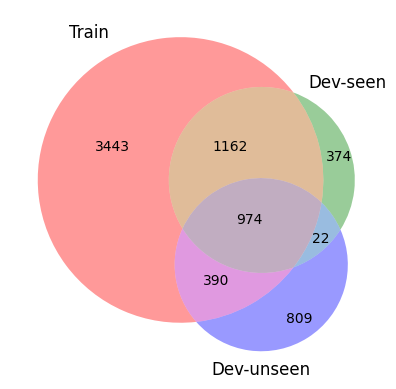

In [23]:
# venn digram over train, dev-seen, dev-unseen

import matplotlib.pyplot as plt
from matplotlib_venn import venn3


tokenized_words_pittsburgh = pittsburgh_valid_instructions.content.apply(word_tokenize)


# Use the venn2 function
set_train = set([w for l in train_tokenized_words.tolist() for w in l])
set_dev_seen = set([w for l in dev_seen_tokenized_words.tolist() for w in l])
set_dev_unseen = set([w for l in dev_unseen_tokenized_words.tolist() for w in l])

venn3([set_train, set_dev_seen, set_dev_unseen], ('Train', 'Dev-seen', 'Dev-unseen'))
plt.show()